In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [233]:
df=pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [234]:
df.shape

(991346, 24)

In [235]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [236]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [237]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [239]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


#   Preprocess

In [240]:
##convert categorical into numerical
LabelEncoder = preprocessing.LabelEncoder()
df.sex= LabelEncoder.fit_transform(df["sex"])
df.DRK_YN = LabelEncoder.fit_transform(df["DRK_YN"])
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


In [241]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

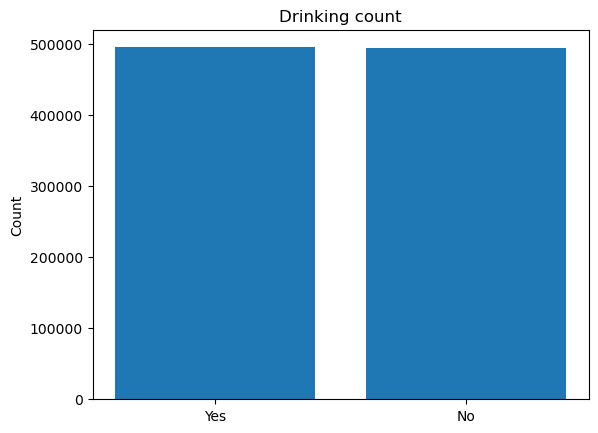

In [242]:
## balancing of attributes

counts = df['DRK_YN'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(counts.index, ["Yes", "No"])  # Specify tick positions and labels
plt.ylabel("Count")
plt.title("Drinking count")
plt.show()


In [243]:
##Outliers
from scipy import stats

z_scores = np.abs(stats.zscore(df[['age','height', 'weight','waistline','sight_left','sight_right','SBP','DBP','BLDS','tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin','serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP',]]))
outlier_indices = (z_scores > 3).any(axis=1)
df = df[~outlier_indices]

In [244]:
df.describe()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,...,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000,904049.000000
mean,0.518060,47.457677,162.103896,62.747368,80.710744,0.955149,0.952681,1.030786,1.029738,121.589456,...,112.810007,121.757552,14.217409,1.081152,0.849177,24.432169,23.541434,31.160323,1.585602,0.492547
std,0.499674,14.218097,9.238902,11.967157,9.330078,0.340911,0.339408,0.172737,0.169865,13.695555,...,32.967792,69.666830,1.494353,0.395438,0.200482,9.015495,13.985833,26.053527,0.808972,0.499945
min,0.000000,20.000000,135.000000,30.000000,48.000000,0.100000,0.100000,1.000000,1.000000,79.000000,...,6.000000,1.000000,9.500000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,111.000000,...,90.000000,72.000000,13.200000,1.000000,0.700000,19.000000,14.000000,15.000000,1.000000,0.000000
50%,1.000000,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,103.000000,14.200000,1.000000,0.800000,22.000000,20.000000,22.000000,1.000000,0.000000
75%,1.000000,60.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,134.000000,152.000000,15.300000,1.000000,1.000000,28.000000,28.000000,36.000000,2.000000,1.000000
max,1.000000,85.000000,190.000000,100.000000,116.500000,2.500000,2.500000,2.000000,2.000000,166.000000,...,220.000000,438.000000,18.900000,6.000000,2.300000,96.000000,104.000000,188.000000,3.000000,1.000000


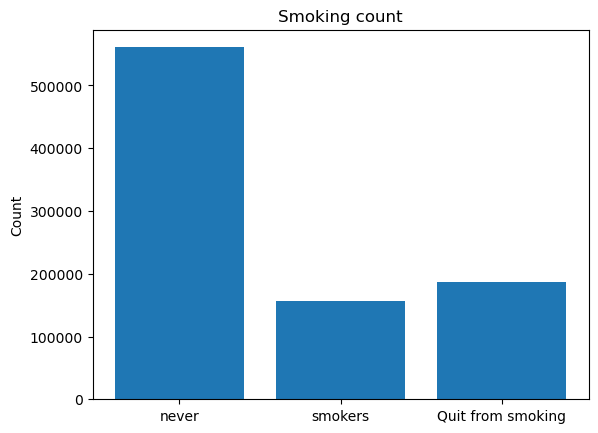

In [245]:
counts = df['SMK_stat_type_cd'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(counts.index, ["never","Quit from smoking","smokers"])  # Specify tick positions and labels
plt.ylabel("Count")
plt.title("Smoking count")
plt.show()

In [246]:
df[df.duplicated()].shape

(20, 24)

In [247]:
##drop duplicate values
df = df.drop_duplicates(keep='first')
df[df.duplicated()].shape

(0, 24)

#    VISUALIZATION

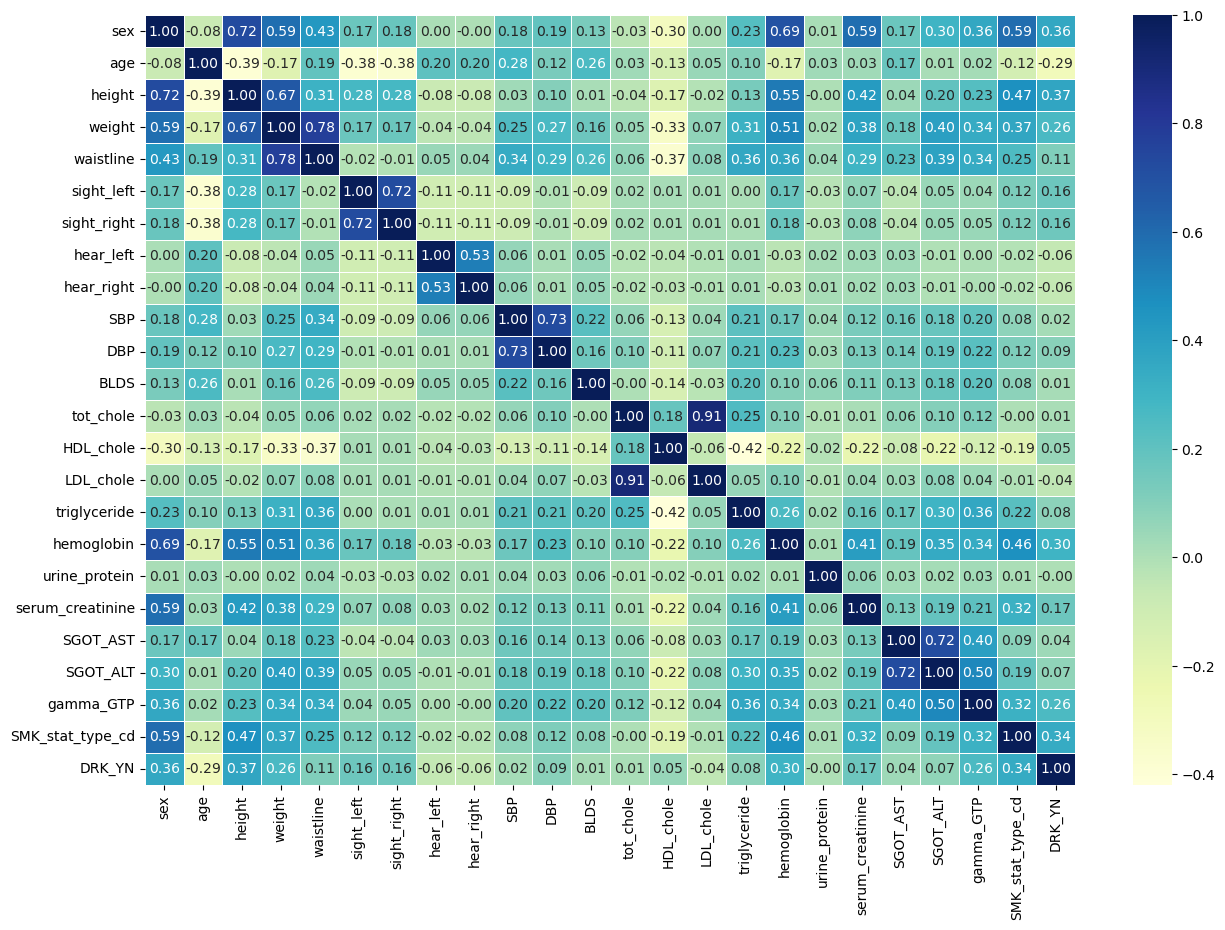

In [248]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [249]:
correlation_threshold = 0.05
DRK_features = []
for feature in corr_matrix.columns:
    if feature != 'DRK_YN' and (corr_matrix[feature]['DRK_YN'] > correlation_threshold or
                                corr_matrix[feature]['DRK_YN'] < -correlation_threshold):
        DRK_features.append(feature)

print("Correlated features with 'DRK_YN':")
print(DRK_features)

Correlated features with 'DRK_YN':
['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']


In [250]:
correlation_threshold = 0.05
SMK_features = []
for feature in corr_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (corr_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                corr_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with SMK_stat_type_cd:")
print(SMK_features)

Correlated features with SMK_stat_type_cd:
['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']


In [251]:
Drinking_age = df.groupby(['age', 'DRK_YN'], as_index=False).agg(n = ('age', 'count'))
Drinking_age.head()


,age,DRK_YN,n
0,20,0,7712
1,20,1,13574
2,25,0,20153
3,25,1,40983
4,30,0,24697


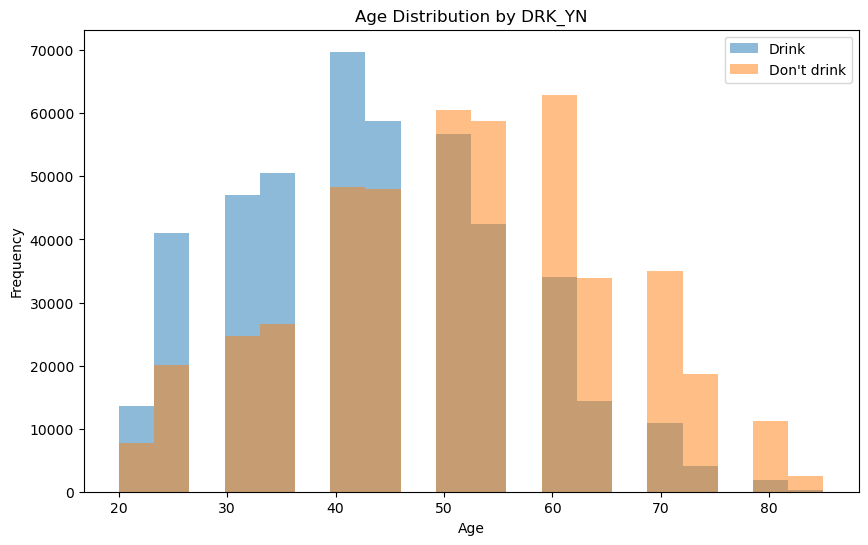

In [252]:
drk_1 = df[df['DRK_YN'] == 1]
drk_2 = df[df['DRK_YN'] == 0]


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='Drink')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label="Don't drink")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()

In [253]:
df1=pd.crosstab(df["SMK_stat_type_cd"],df["age"])
df1

age,20,25,30,35,40,45,50,55,60,65,70,75,80,85
SMK_stat_type_cd,,,,,,,,,,,,,,
1.0,14934,41168,43457,39455,66832,61351,71929,63601,63033,32389,32827,17170,10304,2304
2.0,1184,4792,8969,13067,19717,19854,21921,20585,20420,10546,9476,4111,2170,340
3.0,5168,15176,19283,24530,31453,25584,23370,17101,13410,5302,3670,1385,619,72


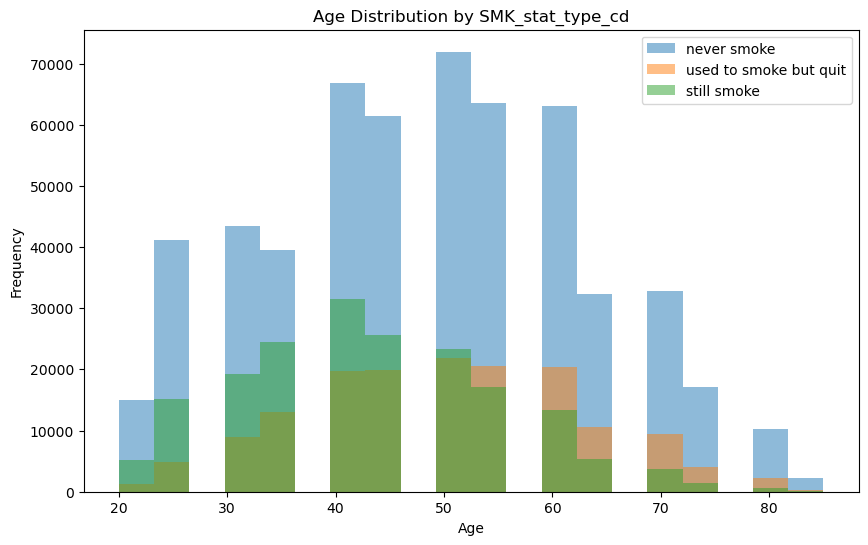

In [254]:
smk_1 = df[df['SMK_stat_type_cd'] == 1]
smk_2 = df[df['SMK_stat_type_cd'] == 2]
smk_3 = df[df['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(smk_1['age'],bins=20, alpha=0.5, label='never smoke')
plt.hist(smk_2['age'],bins=20, alpha=0.5,label='used to smoke but quit')
plt.hist(smk_3['age'],bins=20, alpha=0.5,label='still smoke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


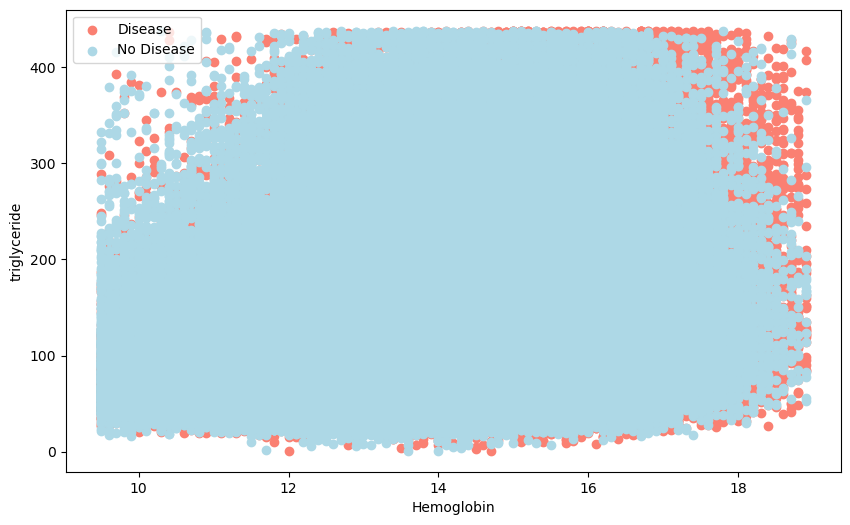

In [255]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.hemoglobin[df.DRK_YN==1], 
            df.triglyceride[df.DRK_YN==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.hemoglobin[df.DRK_YN==0], 
            df.triglyceride[df.DRK_YN==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.xlabel("Hemoglobin")
plt.legend(["Disease", "No Disease"])
plt.ylabel("triglyceride");

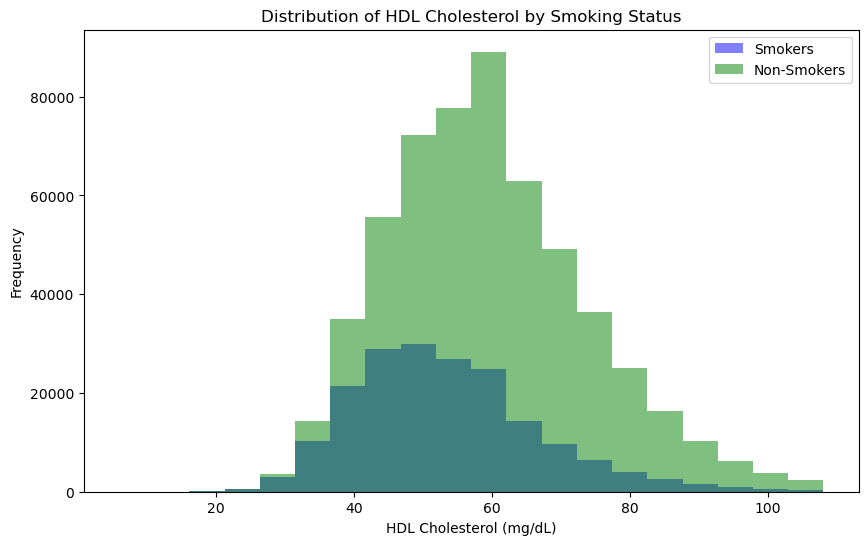

In [256]:
smoker_data = df[df['SMK_stat_type_cd'] == 3]['HDL_chole']
non_smoker_data = df[df['SMK_stat_type_cd'] == 1]['HDL_chole']

# Create a histogram for smokers and non-smokers
plt.figure(figsize=(10, 6))
plt.hist(smoker_data, bins=20, alpha=0.5, label='Smokers', color='blue')
plt.hist(non_smoker_data, bins=20, alpha=0.5, label='Non-Smokers', color='green')

# Customize the plot
plt.xlabel('HDL Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.title('Distribution of HDL Cholesterol by Smoking Status')
plt.legend()

# Show the plot
plt.show()

# Modelling

In [257]:
##scaling the integer columns

vals = df.select_dtypes(['int64','float64']).columns
vals

for col in vals:
    print(col)
    count = len(df[col].unique())
    if count > 3:
        scaler = StandardScaler()
        scaler.fit(df[[col]])
        df[col] = scaler.transform(df[[col]])

age
height
weight
waistline
sight_left
sight_right
hear_left
hear_right
SBP
DBP
BLDS
tot_chole
HDL_chole
LDL_chole
triglyceride
hemoglobin
urine_protein
serum_creatinine
SGOT_AST
SGOT_ALT
gamma_GTP
SMK_stat_type_cd


In [258]:
##sampling
sample_size = 60000
# Perform random sampling
sampled_data = df.sample(n=sample_size, random_state=42) 

###  Drinking model

In [259]:
x=sampled_data[DRK_features]
y=sampled_data["DRK_YN"]

## 1)Logistic Regresion

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lgr_model = LogisticRegression(max_iter=1000, fit_intercept=False)
lgr_model.fit(x_train, y_train)
y_pred_lgr = lgr_model.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
print("Linear LR Accuracy:", accuracy_lgr)

Linear LR Accuracy: 0.7315


In [261]:
print("Precision::")
print(precision_score(y_test, y_pred_lgr))
print("F1 score::")
print(f1_score(y_test, y_pred_lgr))
print("Recall::")
print(recall_score(y_test, y_pred_lgr))
print("Accuracy::")
print(accuracy_score(y_test, y_pred_lgr))

Precision::
0.7307288016818501
F1 score::
0.7213766862677273
Recall::
0.7122609289617486
Accuracy::
0.7315


## 2)Random Forest

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.72075


In [263]:
print("Precision::")
print(precision_score(y_test, y_pred_rf))
print("F1 score::")
print(f1_score(y_test,y_pred_rf))
print("Recall::")
print(recall_score(y_test, y_pred_rf))
print("Accuracy::")
print(accuracy_score(y_test,y_pred_rf))

Precision::
0.717082467082467
F1 score::
0.7118410869378278
Recall::
0.7066757725798191
Accuracy::
0.72075


## 3)Gradient Boosting

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


Gradient Boosting Accuracy: 0.7255833333333334


In [265]:
print("Precision::")
print(precision_score(y_test, y_pred_gb))
print("F1 score::")
print(f1_score(y_test,y_pred_gb))
print("Recall::")
print(recall_score(y_test,y_pred_gb))
print("Accuracy::")
print(accuracy_score(y_test,y_pred_gb))

Precision::
0.7199797331531835
F1 score::
0.7213808274811744
Recall::
0.7227873855544252
Accuracy::
0.7255833333333334


###  Smoking Model

In [266]:
x1=sampled_data[SMK_features]
y1=sampled_data["SMK_stat_type_cd"]

### 1)SVM

In [267]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)
svc_model = LinearSVC(max_iter=1000)
svc_model.fit(x1_train, y1_train)
y1_pred_svc = svc_model.predict(x1_test)
accuracy_svc = accuracy_score(y1_test, y1_pred_svc)
print("Linear SVM Accuracy:", accuracy_svc)

Linear SVM Accuracy: 0.7054166666666667


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


###  2)Random Forest

In [268]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)
rf_model = RandomForestClassifier()
rf_model.fit(x1_train, y1_train)
y1_pred_rf = rf_model.predict(x1_test)
accuracy_rf = accuracy_score(y1_test, y1_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7010833333333333


###  3)Gradient Boosting

In [269]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)
gb_model = GradientBoostingClassifier()
gb_model.fit(x1_train, y1_train)
y1_pred_gb = gb_model.predict(x1_test)
accuracy_gb = accuracy_score(y1_test, y1_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.7135833333333333
